Tomato Leaf Disease Prediction

Dataset Link - https://www.kaggle.com/datasets/noulam/tomato  

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
train_dir = "/content/gdrive/My Drive/Colab Notebooks/Augmented Tomato Dataset/val/train"
valid_dir = "/content/gdrive/My Drive/Colab Notebooks/Augmented Tomato Dataset/val/val"
test_dir = "/content/gdrive/My Drive/Colab Notebooks/Augmented Tomato Dataset/valid"

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio(train_dir,output=valid_dir,seed=38,ratio=(0.8,0.2),group_prefix=None)

Copying files: 18345 files [07:04, 43.21 files/s] 


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(64,64,3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (64,64)
BATCH_SIZE = 128
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
train_data = train_datagen.flow_from_directory(train_dir, target_size =  IMG_SIZE, 
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')
val_data= val_datagen.flow_from_directory(valid_dir, target_size = IMG_SIZE, 
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size = IMG_SIZE, 
                                                 batch_size = BATCH_SIZE, class_mode = 'categorical',shuffle=False)


Found 14671 images belonging to 10 classes.
Found 3674 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
for image_batch, labels_batch in test_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 64, 64, 3)
(128, 10)


In [ ]:
class_names = list(train_data.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
train_data.class_indices.keys()

dict_keys(['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'])

In [ ]:
train_data.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
total_classes = len(class_names)
total_classes

10

In [ ]:
IMG_SIZE = (64,64)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
classifier=Sequential()

classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
train_data

In [ ]:
history = classifier.fit(
    train_data,
    epochs=50,
    batch_size=128,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data)
)

Epoch 1/50
115/115 [==============================] - 81s 705ms/step - loss: 0.1072 - accuracy: 0.9607 - val_loss: 0.1242 - val_accuracy: 0.9638
Epoch 2/50
115/115 [==============================] - 80s 698ms/step - loss: 0.0982 - accuracy: 0.9658 - val_loss: 0.1354 - val_accuracy: 0.9570
Epoch 3/50
115/115 [==============================] - 85s 741ms/step - loss: 0.1374 - accuracy: 0.9501 - val_loss: 0.1219 - val_accuracy: 0.9594
Epoch 4/50
115/115 [==============================] - 79s 686ms/step - loss: 0.1109 - accuracy: 0.9604 - val_loss: 0.1434 - val_accuracy: 0.9556
Epoch 5/50
115/115 [==============================] - 84s 733ms/step - loss: 0.0980 - accuracy: 0.9659 - val_loss: 0.1364 - val_accuracy: 0.9496
Epoch 6/50
115/115 [==============================] - 84s 732ms/step - loss: 0.1087 - accuracy: 0.9605 - val_loss: 0.1132 - val_accuracy: 0.9622
Epoch 7/50
115/115 [==============================] - 78s 682ms/step - loss: 0.1012 - accuracy: 0.9643 - val_loss: 0.1061 - val_ac

KeyboardInterrupt: ignored

In [ ]:
scores = classifier.evaluate(test_data)

36/36 [==============================] - 1041s 30s/step - loss: 0.0926 - accuracy: 0.9708


In [ ]:
scores

[0.09261630475521088, 0.9707742929458618]

In [ ]:
classifier.save('/content/gdrive/My Drive/Colab Notebooks/final_cnn_model_tomato_disease.h5')

In [ ]:
classifier.save('final_cnn_model_tomato_disease.h5')

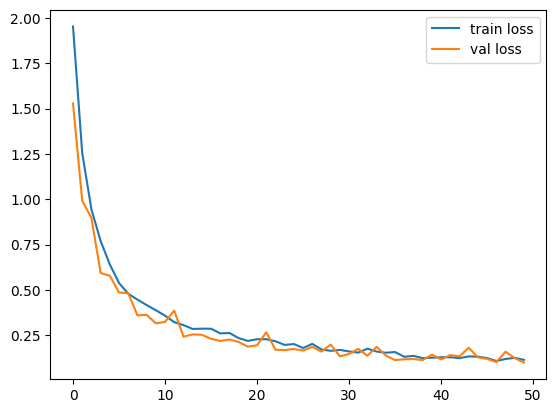

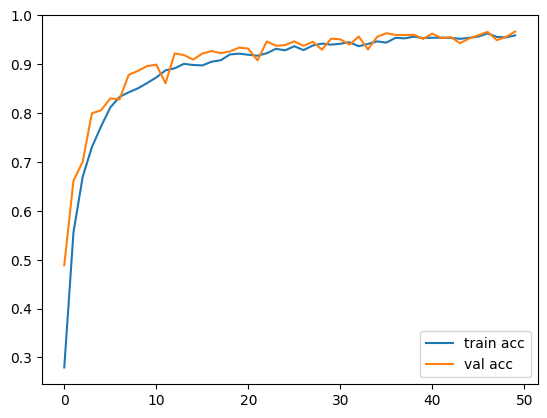

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_CNN_Tomato')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_CNN_Tomato')

In [ ]:
from tensorflow.keras.models import load_model
classifier=load_model('/content/gdrive/My Drive/Colab Notebooks/final_cnn_model_tomato_disease.h5')

In [ ]:

y_pred = classifier.predict(test_data)
y_pred

36/36 [==============================] - 1034s 29s/step


array([[9.9979311e-01, 1.1494308e-04, 1.2992401e-06, ..., 7.0769143e-05,
        9.0113495e-16, 3.8471995e-13],
       [9.9999917e-01, 2.8280823e-07, 1.5054304e-09, ..., 4.3306542e-07,
        2.5772552e-19, 5.8799760e-14],
       [9.9999928e-01, 1.1415715e-07, 1.0770352e-08, ..., 5.0984733e-07,
        4.4114729e-18, 1.2491727e-12],
       ...,
       [5.2412123e-08, 1.2224018e-10, 5.3869793e-05, ..., 8.6079777e-10,
        2.2546720e-09, 9.9994445e-01],
       [6.4072005e-08, 5.2694665e-11, 1.0056317e-06, ..., 9.1765250e-12,
        6.7190790e-13, 9.9999893e-01],
       [4.7991398e-07, 4.0406928e-10, 5.6277082e-07, ..., 6.6377980e-11,
        5.9750382e-10, 9.9897230e-01]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [ ]:
from PIL import Image

1/1 [==============================] - 0s 21ms/step


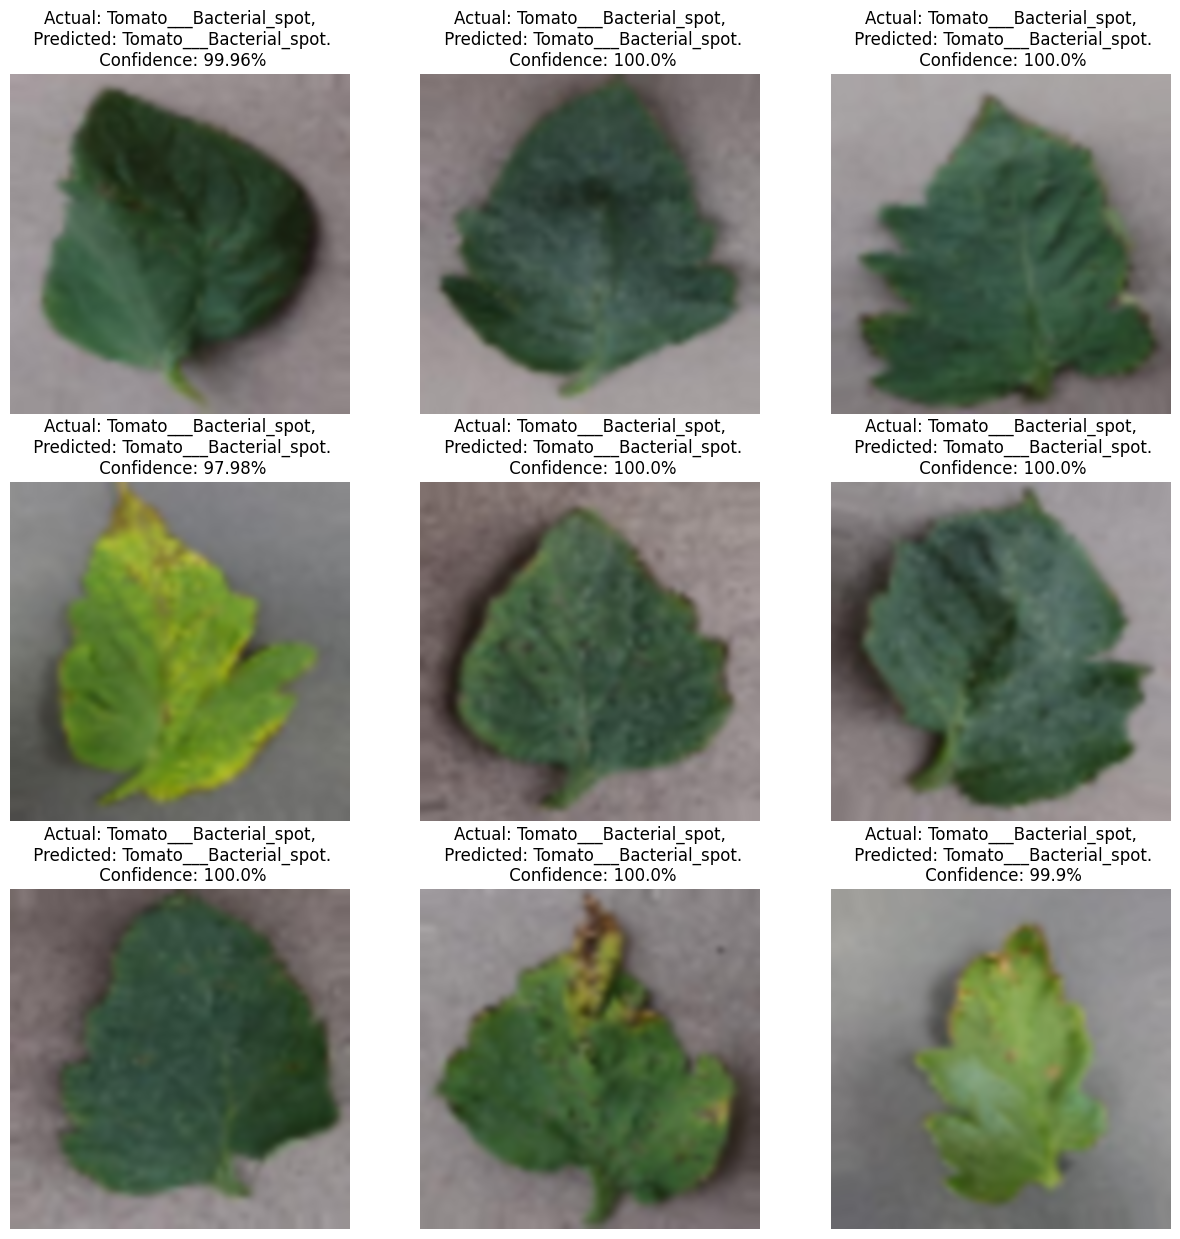

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_data:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i],interpolation="bicubic")
        predicted_class, confidence = predict(classifier, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

<ipython-input-15-482e536d5972>:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = classifier.predict_generator(test_data)


Confusion Matrix
Normalized confusion matrix
Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.99      0.98       425
                        Tomato___Early_blight       0.95      0.95      0.95       480
                         Tomato___Late_blight       0.98      0.93      0.95       463
                           Tomato___Leaf_Mold       0.99      0.97      0.98       470
                  Tomato___Septoria_leaf_spot       0.97      0.96      0.97       436
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.97      0.96       435
                         Tomato___Target_Spot       0.92      0.96      0.94       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.98       490
                 Tomato___Tomato_mosaic_virus       0.98      0.99      0.99       448
                             Tomato___healthy       0.99      

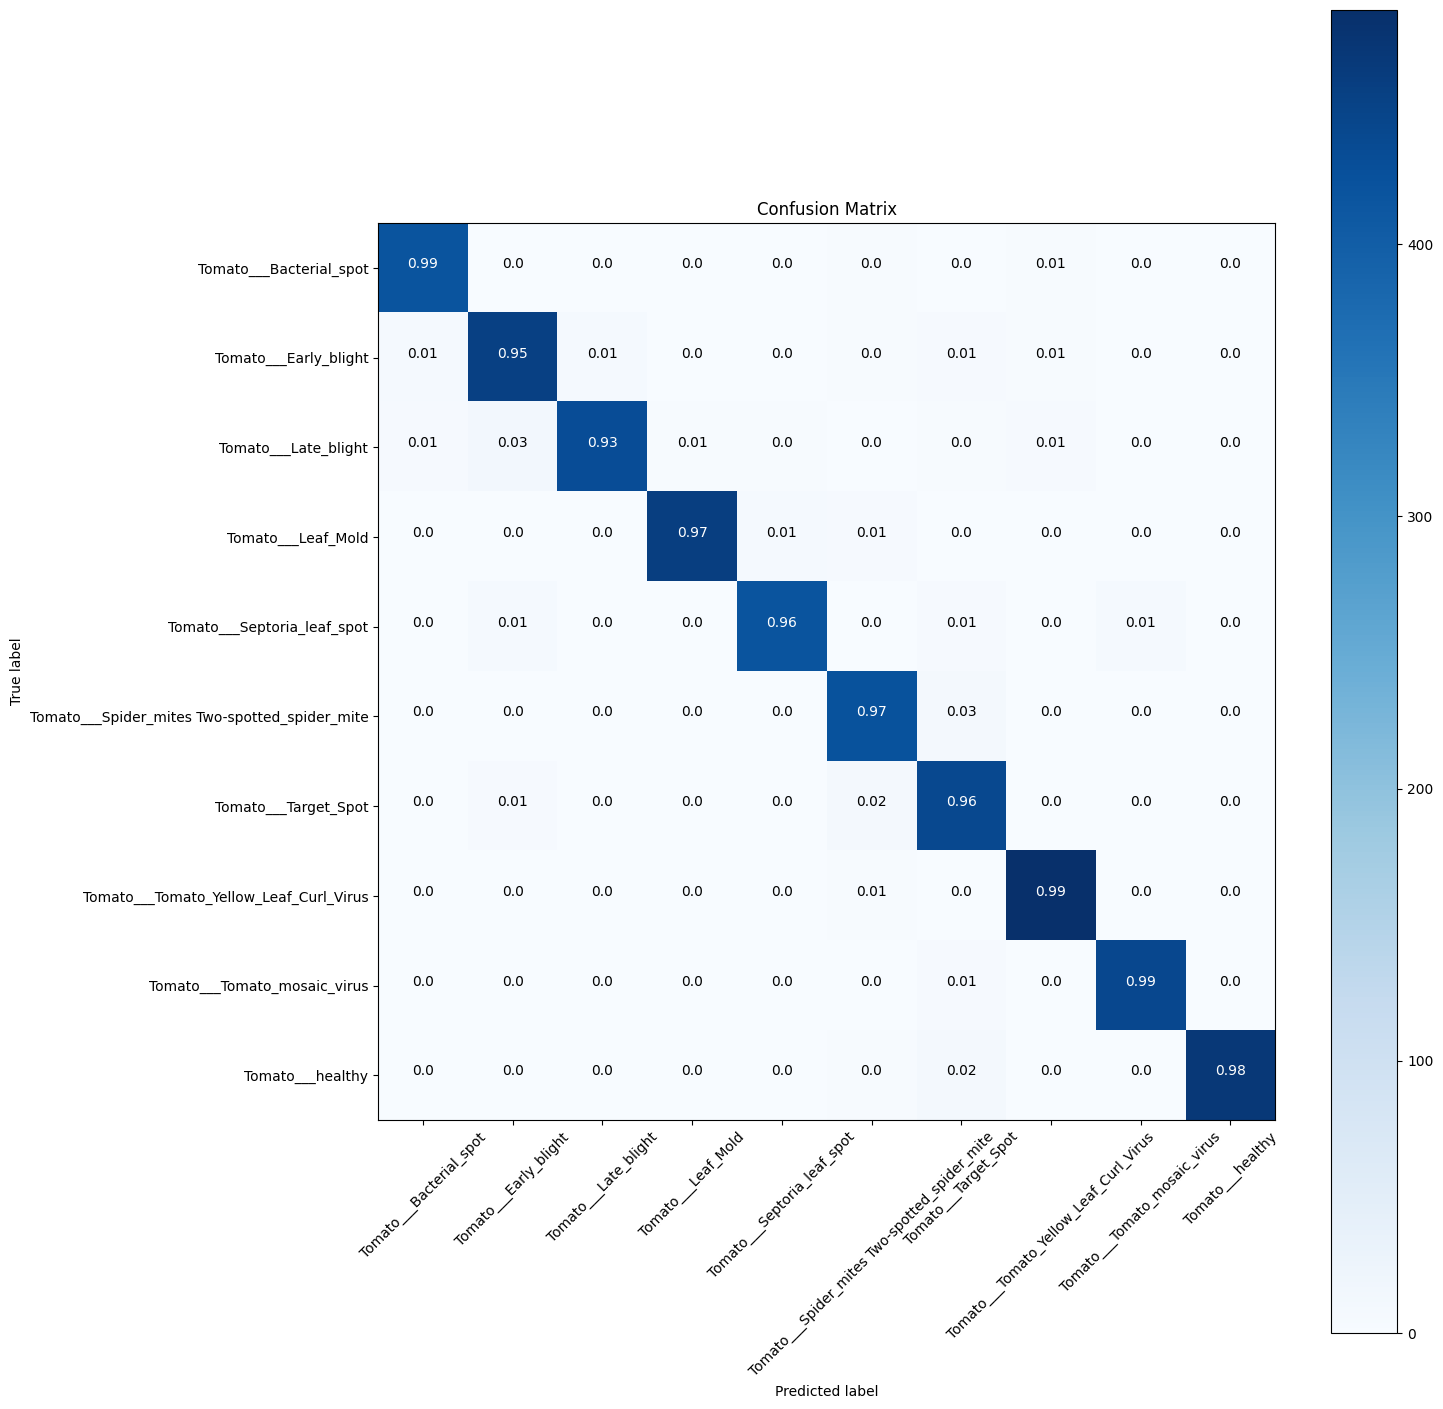

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_data.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = classifier.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=target_names))

<ipython-input-16-cfa9abff0fb9>:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = classifier.predict_generator(test_data)


Confusion Matrix
Classification Report
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.98      0.97       425
                        Tomato___Early_blight       0.95      0.95      0.95       480
                         Tomato___Late_blight       0.98      0.93      0.96       463
                           Tomato___Leaf_Mold       0.99      0.98      0.98       470
                  Tomato___Septoria_leaf_spot       0.97      0.96      0.97       436
Tomato___Spider_mites Two-spotted_spider_mite       0.94      0.98      0.96       435
                         Tomato___Target_Spot       0.94      0.95      0.94       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.99      0.98       490
                 Tomato___Tomato_mosaic_virus       0.98      0.99      0.98       448
                             Tomato___healthy       0.99      0.98      0.98       481

  

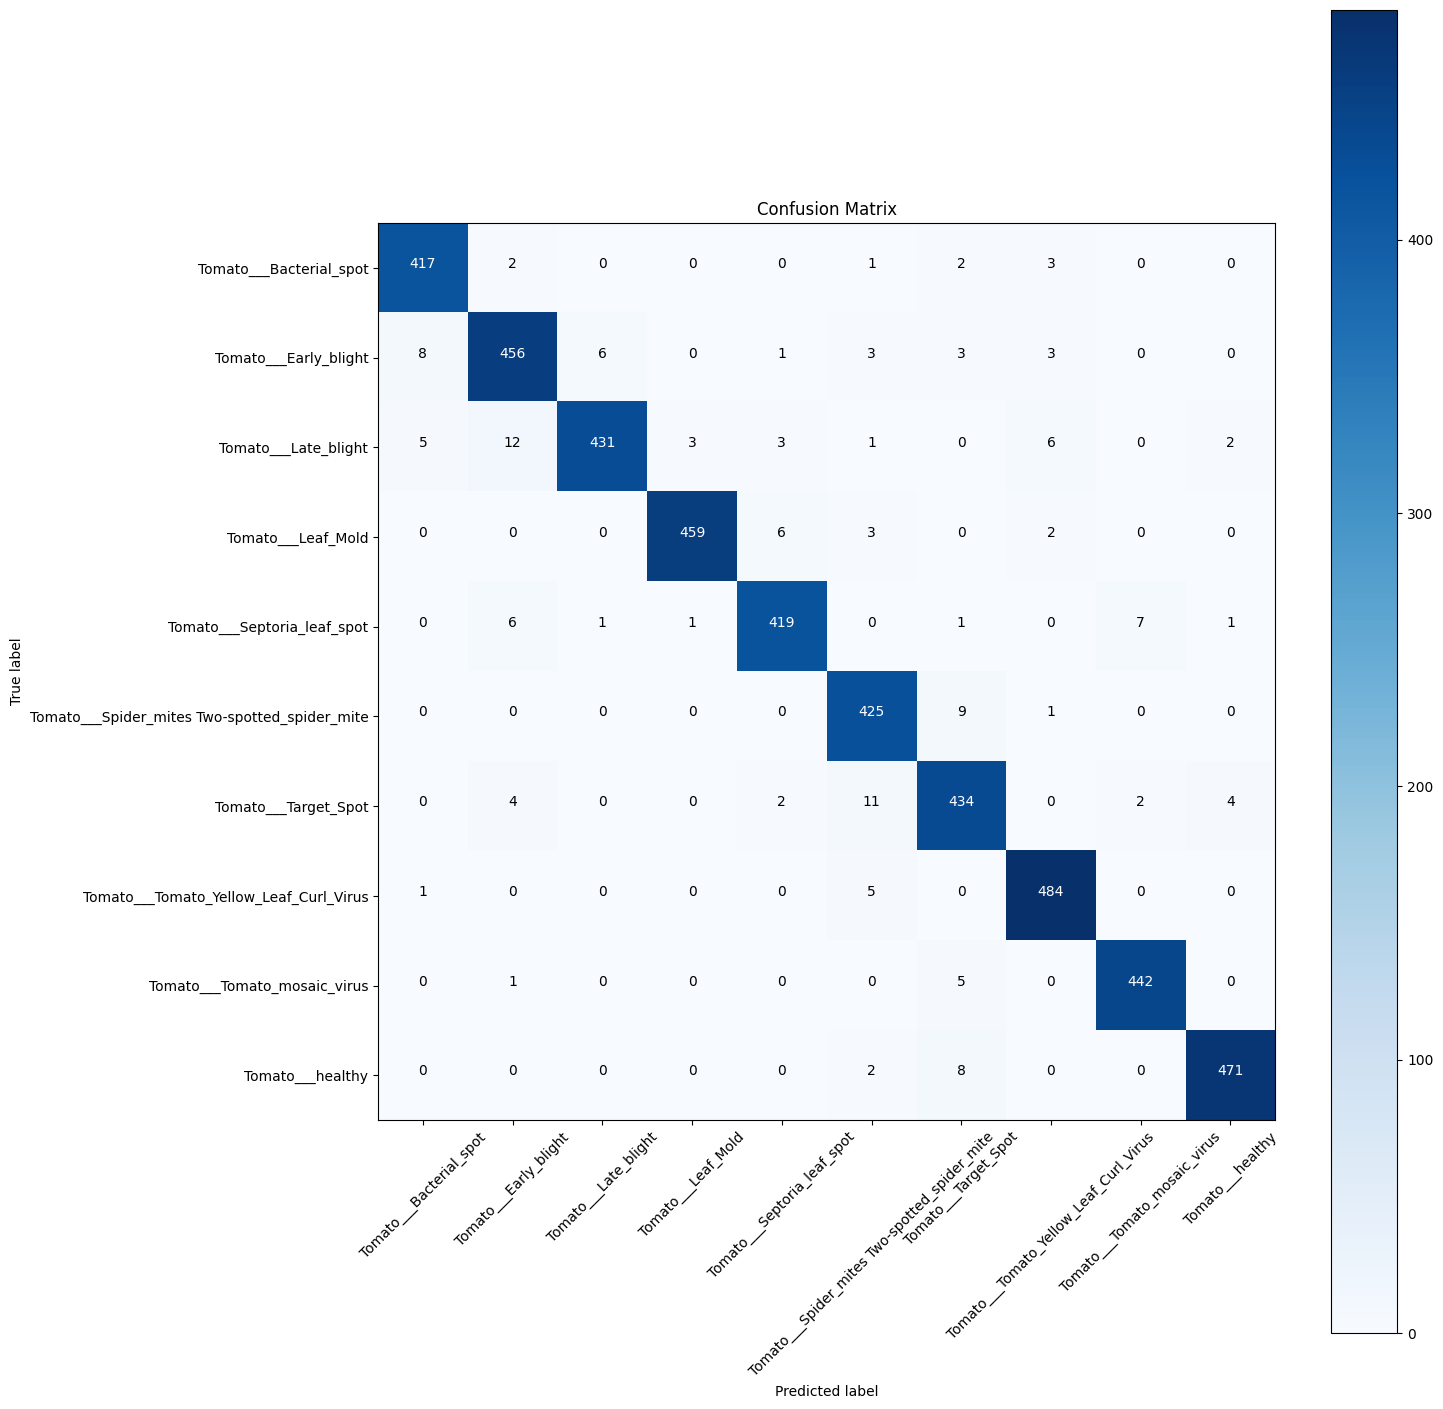

In [ ]:
#Plot the confusion matrix. 
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_data.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = classifier.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=target_names))

In [ ]:
y_true=test_data.classes

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#get classification report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       425
           1       0.95      0.95      0.95       480
           2       0.98      0.93      0.96       463
           3       0.99      0.98      0.98       470
           4       0.97      0.96      0.97       436
           5       0.94      0.98      0.96       435
           6       0.94      0.95      0.94       457
           7       0.97      0.99      0.98       490
           8       0.98      0.99      0.98       448
           9       0.99      0.98      0.98       481

    accuracy                           0.97      4585
   macro avg       0.97      0.97      0.97      4585
weighted avg       0.97      0.97      0.97      4585



In [ ]:
#get confusion matrix
print(confusion_matrix(y_true,y_pred))

[[417   2   0   0   0   1   2   3   0   0]
 [  8 456   6   0   1   3   3   3   0   0]
 [  5  12 431   3   3   1   0   6   0   2]
 [  0   0   0 459   6   3   0   2   0   0]
 [  0   6   1   1 419   0   1   0   7   1]
 [  0   0   0   0   0 425   9   1   0   0]
 [  0   4   0   0   2  11 434   0   2   4]
 [  1   0   0   0   0   5   0 484   0   0]
 [  0   1   0   0   0   0   5   0 442   0]
 [  0   0   0   0   0   2   8   0   0 471]]


In [ ]:
import seaborn as sns
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

In [ ]:
unique_elements_train,counts_train=np.unique(train_data.classes,return_counts=True)
counts_train

array([1361, 1536, 1480, 1505, 1396, 1392, 1461, 1568, 1432, 1540])

In [ ]:
unique_elements_val,counts_val=np.unique(val_data.classes,return_counts=True)
counts_val

array([341, 384, 371, 377, 349, 349, 366, 393, 358, 386])

In [ ]:
unique_elements_test,counts_test=np.unique(test_data.classes,return_counts=True)
counts_test

array([425, 480, 463, 470, 436, 435, 457, 490, 448, 481])

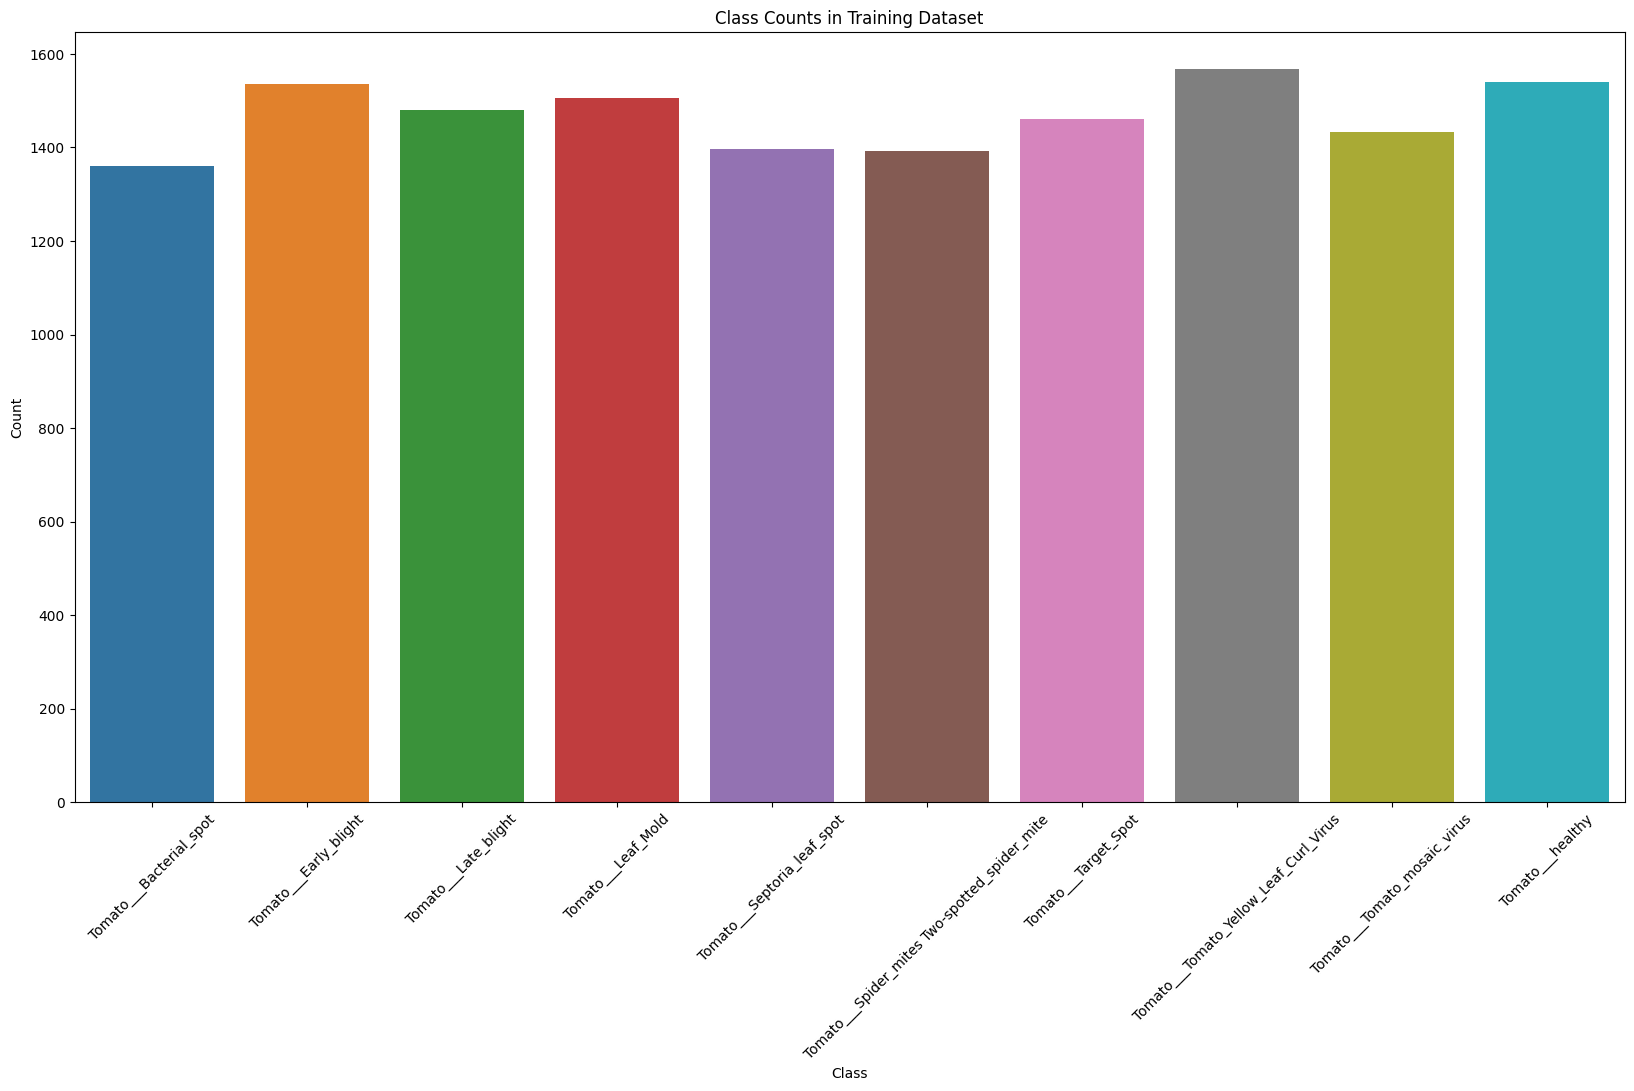

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x=class_names, y=counts_train)
plt.title('Class Counts in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

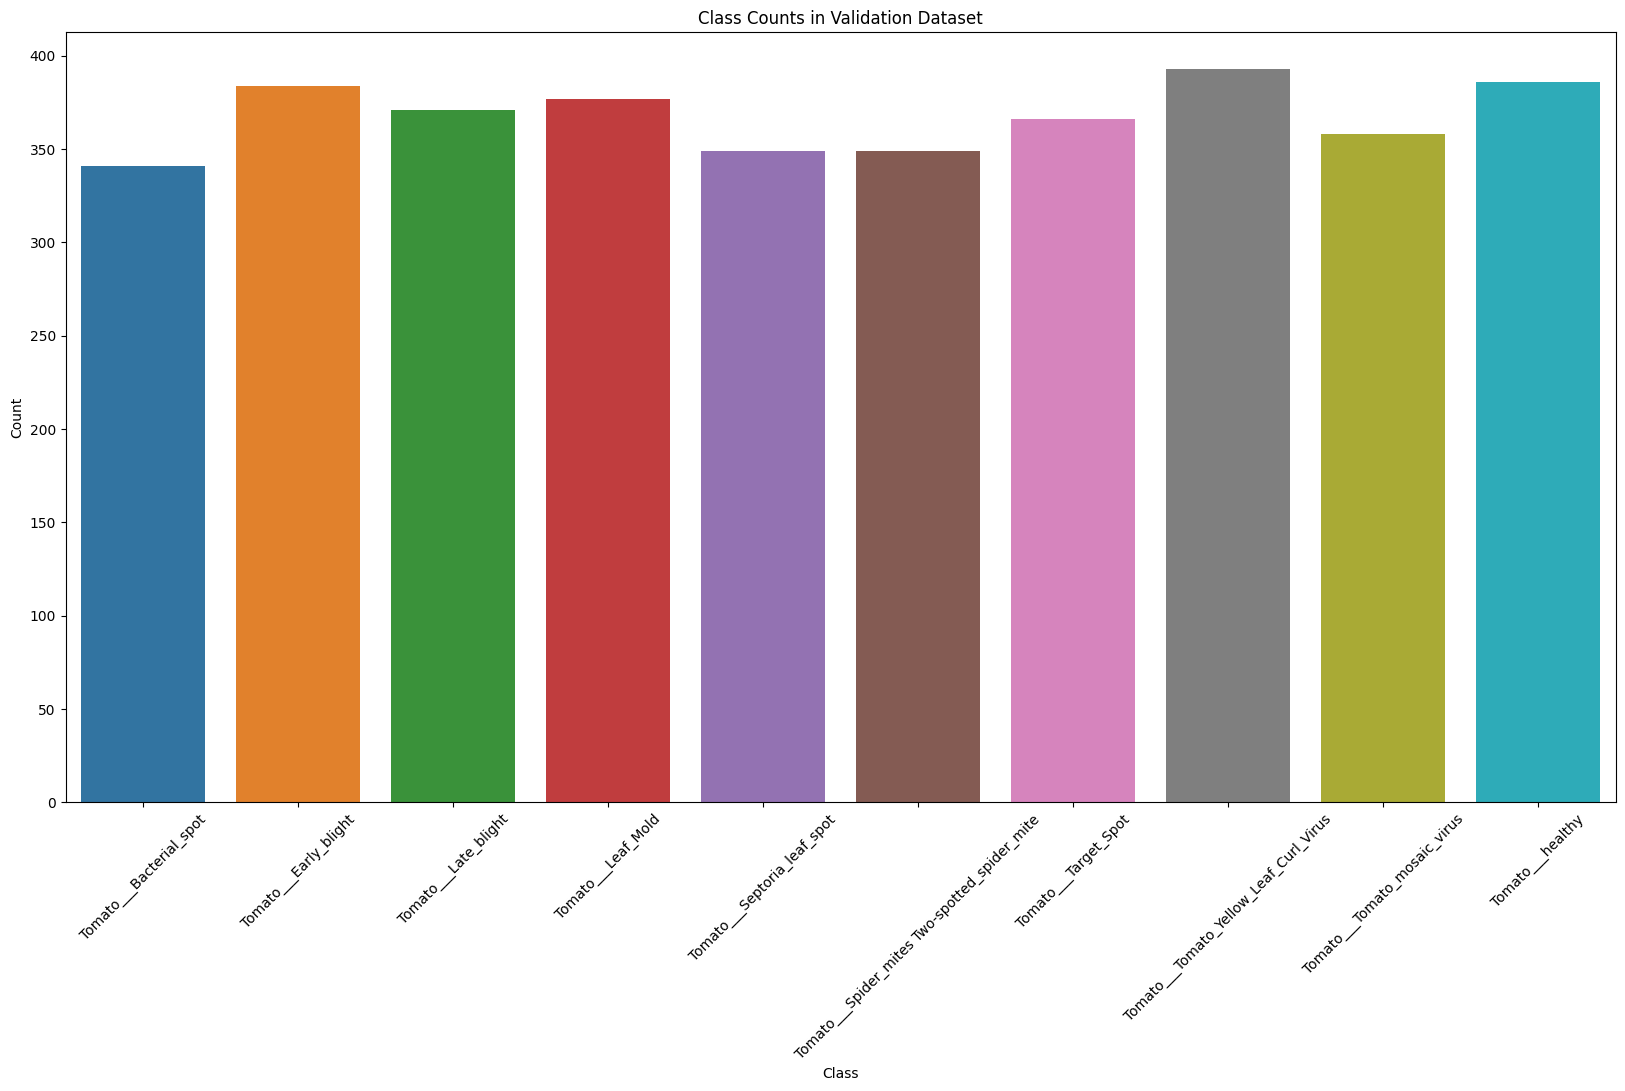

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=class_names, y=counts_val)
plt.title('Class Counts in Validation Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

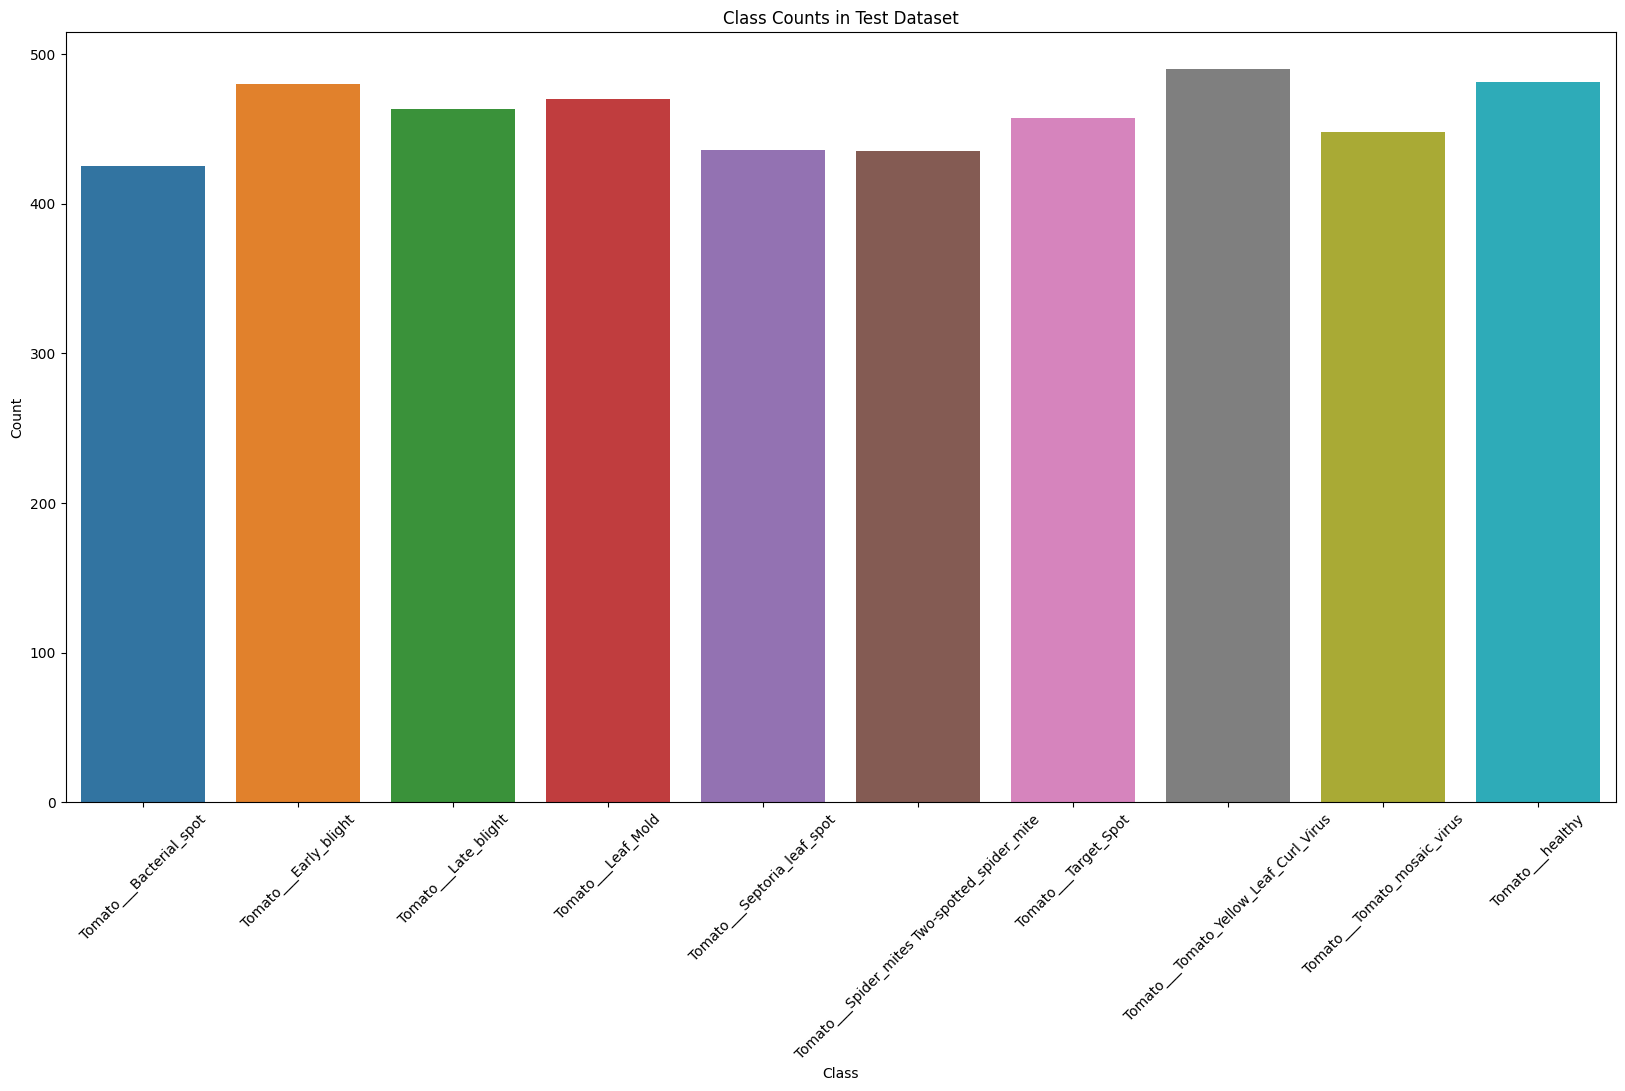

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=class_names, y=counts_test)
plt.title('Class Counts in Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
y_pred1 = classifier.predict(test_data)

36/36 [==============================] - 1202s 34s/step


In [ ]:
y_probs=y_pred1/np.sum(y_pred1,axis=1,keepdims=True)

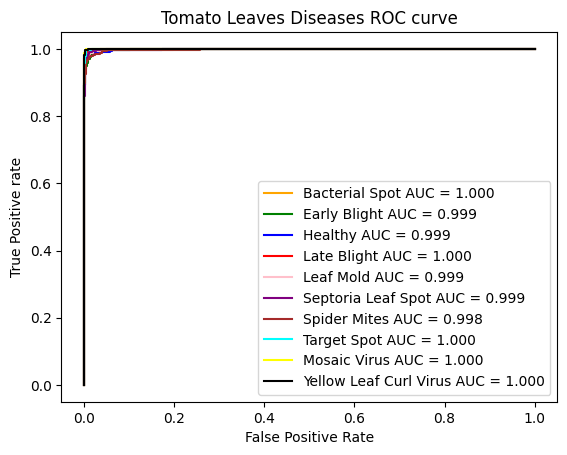

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 10

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_probs[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')